# Formato ancho frente a formato largo

## Acerca de los datos
En este notebook utilizaremos datos diarios de temperatura de la API [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). Utilizaremos el conjunto de datos Global Historical Climatology Network - Daily (GHCND) para la estación Boonton 1 (GHCND:USC00280907); consulte la documentación [aquí](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

*Nota: El NCEI forma parte de la Administración Nacional Oceánica y Atmosférica (NOAA) y, como puede verse en la URL de la API, este recurso se creó cuando el NCEI se llamaba NCDC. Si la URL de este recurso cambiara en el futuro, puede buscar "NCEI weather API" para encontrar la actualizada.*

## Configuración

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # ordenar columnas

## Formato ancho
Cada una de nuestras variables tiene su propia columna:

In [ ]:
wide_df.head(6) #TOBS = Temperature at the time of observation (Fahrenheit or Celsius as per user preference)

Describir todas las columnas es fácil:

In [ ]:
wide_df.describe(include='all')

Es fácil de graficar con `pandas` (tratadas en el capítulo 5):

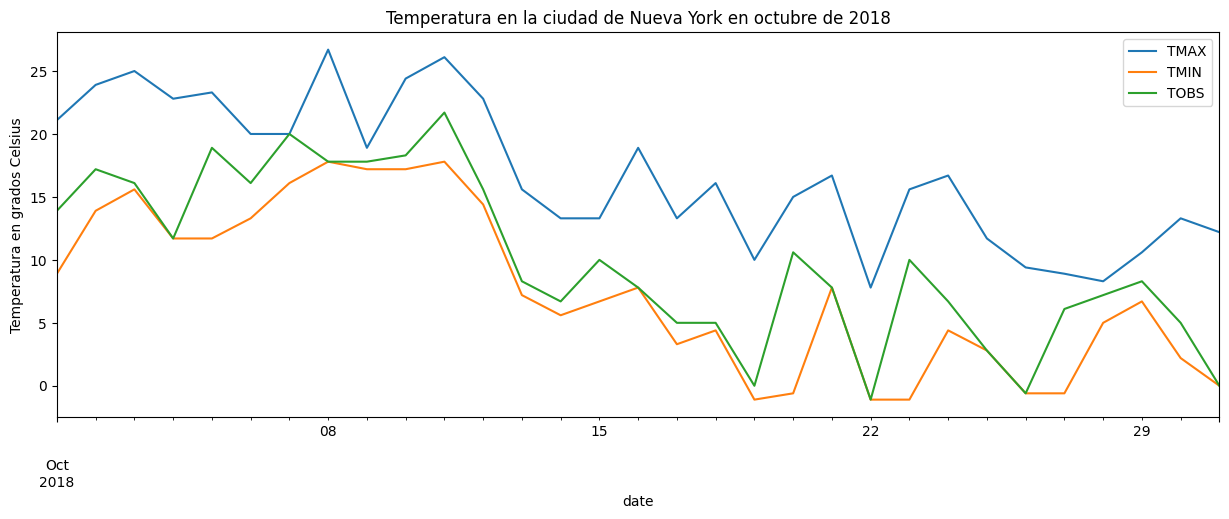

In [2]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), 
    title='Temperatura en la ciudad de Nueva York en octubre de 2018'
).set_ylabel('Temperatura en grados Celsius')
plt.show()

## Formato largo
Los nombres de nuestras variables están ahora en la columna `datatype` y sus valores en la columna `value`. Ahora tenemos 3 filas para cada fecha, ya que tenemos 3 `datatypes` diferentes:

In [ ]:
long_df.head(6)

Dado que tenemos muchas filas para la misma fecha, utilizar `describe()` no es muy útil:

In [ ]:
long_df.describe(include='all')

Trazar datos de formato largo en `pandas` puede ser bastante complicado. En su lugar se utiliza `seaborn` (tratado en [`ch_06/1-introduccion_a_seaborn.ipynb`](../ch_06/1-introduccion_a_seaborn.ipynb)):

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperatura en grados Celsius')
ax.set_title('Temperatura en la ciudad de Nueva York en octubre de 2018')
plt.show()

Con datos largos y `seaborn`, podemos facetar fácilmente nuestros gráficos:

In [ ]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

<hr>
<div>
    <a href="../ch_02/6-anadiendo_y_eliminando_data.ipynb">
        <button style="float: left;">&#8592; Capitulo 2</button>
    </a>
    <a href="./2-usando_la_api_weather.ipynb">
        <button style="float: right;">Sigueinte Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>